### Capstone Project 1:Final Report


###  Introduction

The purpose of the project is to predict “How Long a Flight Will be Delay at the Destination Airport”?
In 2015 there were lots of flight delays in the United States. The U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics tracks the status of the flights by providing a summary of the arrival delays, departure delays, scheduled departure, on-time arrival in their monthly report.

### Variable/Feature
My target variable is Arrival-Delay. It is a float

We also viewed all the other variables and did not do any feature selection because there were some variables that correlated with each other.

For example, Weather Delay, Departure Delay, Distance, and Carrier are important variables for our model.
### Purpose, motivation and description:
For the prediction I used the basic models. I created a data set that can be used for both visualization and Model Building. 
The purpose of visualization is to get a better inference of the data.

For the Split test, the dataset has been separated into training and Testing data so that prediction can be done on the testing data. I also import Tableau that can make the visualization more feasible.

The technical aspects used for visualization are Matplolib and seaborn. Including data manipulation: pandas, NumPy, modeling -sklearn: Linear Regression, Random Forest & Decision Tree.

### Data acquisition
The data is acquired from Kaggle:https://www.kaggle.com/usdot/flight-delays. 

### Data Management

The data was in CSV file. It consists of three data sets:  Flight Delays, Airlines and Airports. 
The flight data set contains 5819079 rows with 31 columns and 14 different carriers.


In [1]:
import datetime,scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Gathering Data

In [5]:
data = pd.read_csv("flights.csv")

/Users/lilie/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [83]:
data=data.sample(n=100000)

In [84]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5304822 to 837005
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99749 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       98496 non-null   float64
 11  DEPARTURE_DELAY      98496 non-null   float64
 12  TAXI_OUT             98453 non-null   float64
 13  WHEELS_OFF           98453 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIM

## Data Insights

In [80]:
data.shape

(100000, 31)

The dataset comprises of 5819079 rows  and 31 columns.


### Summary Statistics

We used isnull() to find the missing values in the dataset and we dropped the rows which had missing values using dropna ().
We also converted categorical variables using one hot encoding but we did not use any other new variables.


In [7]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,98567.000000,98567.000000,98519.000000,98519.000000,...,100000.00000,98463.000000,98262.000000,100000.000000,100000.000000,18298.000000,18298.000000,18298.000000,18298.000000,18298.000000
mean,2015.0,6.518270,15.752430,3.928900,2181.275680,1330.654150,1335.983940,9.388061,16.131711,1357.680153,...,1493.96818,1476.977636,4.448088,0.002410,0.014970,13.657777,0.077549,18.617445,23.704776,2.929555
std,0.0,3.411504,8.791039,2.001436,1759.683847,484.068943,496.750957,36.531606,9.073852,498.409708,...,507.48133,526.458553,38.750842,0.049033,0.121433,26.946926,2.035094,47.052713,43.143930,20.173476
min,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-40.000000,1.000000,1.000000,...,1.00000,1.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,735.000000,918.000000,922.000000,-5.000000,11.000000,936.000000,...,1109.00000,1057.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1702.000000,1326.000000,1332.000000,-2.000000,14.000000,1344.000000,...,1520.00000,1513.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000,23.000000,6.000000,3247.000000,1730.000000,1740.000000,7.000000,19.000000,1754.000000,...,1918.00000,1916.000000,8.000000,0.000000,0.000000,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.000000,2400.000000,1076.000000,180.000000,2400.000000,...,2359.00000,2400.000000,1090.000000,1.000000,1.000000,390.000000,148.000000,1076.000000,635.000000,748.000000


In [8]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3897267,2015,8,30,7,AA,772,N200UU,SJU,PHL,1510,...,1853.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2835037,2015,6,27,6,WN,3161,N7710A,BOS,STL,1645,...,2040.0,110.0,0,0,NaN,0.0,0.0,13.0,97.0,0.0
3245709,2015,7,22,3,UA,1415,N35271,SFO,PDX,1057,...,1230.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2645777,2015,6,16,2,EV,5449,N371CA,DTW,ELM,1350,...,1447.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5365777,2015,12,2,3,EV,4876,N166PQ,DTW,ORF,1541,...,1730.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


From the above table, it is clear that the data is not properly organized. The data has many unnecessary columns that are not useful for visualization .  

### Data Wrangling
We used isnull() to find the missing values in the dataset and we dropped the rows which had missing values using dropna ()

In [9]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [11]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [12]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [77]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [78]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000
MONTH                   0.000
DAY                     0.000
DAY_OF_WEEK             0.000
AIRLINE                 0.000
FLIGHT_NUMBER           0.000
TAIL_NUMBER             0.251
ORIGIN_AIRPORT          0.000
DESTINATION_AIRPORT     0.000
SCHEDULED_DEPARTURE     0.000
DEPARTURE_TIME          1.433
DEPARTURE_DELAY         1.433
TAXI_OUT                1.481
WHEELS_OFF              1.481
SCHEDULED_TIME          0.000
ELAPSED_TIME            1.738
AIR_TIME                1.738
DISTANCE                0.000
WHEELS_ON               1.537
TAXI_IN                 1.537
SCHEDULED_ARRIVAL       0.000
ARRIVAL_TIME            1.537
ARRIVAL_DELAY           1.738
DIVERTED                0.000
CANCELLED               0.000
CANCELLATION_REASON    98.503
AIR_SYSTEM_DELAY       81.702
SECURITY_DELAY         81.702
AIRLINE_DELAY          81.702
LATE_AIRCRAFT_DELAY    81.702
WEATHER_DELAY          81.702
dtype: float64

We can see that 98% of the values in the Cancellation reason column are null for which it is of less use while predicting Delays. Some other columns include 81.7% in Air System Delay, Security Delay, Airline Delay, Weather Delay etc. So I am going to create two Datasets which have no null values. First, I am removing all the null values irrespective of different types of Delays. Second, I am going to take the data set with respect to different types of delays. The first Dataset is named as Flights and the other one is named as Flight_Delays.


In [ ]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [16]:
data1.shape

(98262, 31)

data1.isnull().sum()

In [18]:
# Creating Dataset with different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [19]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18298 entries, 2835037 to 692726
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINE              18298 non-null  object 
 1   ORIGIN_AIRPORT       18298 non-null  object 
 2   DESTINATION_AIRPORT  18298 non-null  object 
 3   DEPARTURE_DELAY      18298 non-null  float64
 4   TAXI_OUT             18298 non-null  float64
 5   ELAPSED_TIME         18298 non-null  float64
 6   DISTANCE             18298 non-null  int64  
 7   TAXI_IN              18298 non-null  float64
 8   ARRIVAL_DELAY        18298 non-null  float64
 9   AIR_SYSTEM_DELAY     18298 non-null  float64
 10  SECURITY_DELAY       18298 non-null  float64
 11  AIRLINE_DELAY        18298 non-null  float64
 12  LATE_AIRCRAFT_DELAY  18298 non-null  float64
 13  WEATHER_DELAY        18298 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 2.1+ MB


In [20]:
# The other Dataset
Flight_Delays = data11

In [21]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [22]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [23]:
data2.shape

(98262, 25)

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98262 entries, 3897267 to 692726
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 98262 non-null  int64  
 1   MONTH                98262 non-null  int64  
 2   DAY                  98262 non-null  int64  
 3   DAY_OF_WEEK          98262 non-null  int64  
 4   AIRLINE              98262 non-null  object 
 5   FLIGHT_NUMBER        98262 non-null  int64  
 6   TAIL_NUMBER          98262 non-null  object 
 7   ORIGIN_AIRPORT       98262 non-null  object 
 8   DESTINATION_AIRPORT  98262 non-null  object 
 9   SCHEDULED_DEPARTURE  98262 non-null  int64  
 10  DEPARTURE_TIME       98262 non-null  float64
 11  DEPARTURE_DELAY      98262 non-null  float64
 12  TAXI_OUT             98262 non-null  float64
 13  WHEELS_OFF           98262 non-null  float64
 14  SCHEDULED_TIME       98262 non-null  float64
 15  ELAPSED_TIME         98262 no

Data has only float and integer values/No variable column has null or missing values.

In [25]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [26]:
data2.DEPARTURE_TIME.describe()

count    98262.000000
mean      1335.831298
std        496.653559
min          1.000000
25%        922.000000
50%       1331.000000
75%       1740.000000
max       2400.000000
Name: DEPARTURE_TIME, dtype: float64

In [27]:
data2.DEPARTURE_TIME.describe()

count    98262.000000
mean      1335.831298
std        496.653559
min          1.000000
25%        922.000000
50%       1331.000000
75%       1740.000000
max       2400.000000
Name: DEPARTURE_TIME, dtype: float64

###   
The departure time above is not very much informative so I am going to change it in the datetime format so that we get a better idea of the time.

In [28]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [29]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)


In [30]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [31]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])


In [32]:
data2['Day'] = data2['Date']

In [33]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

# Merging of  3 data sets

Since there are three dataset it is required to merge all the three data set so that we can use them during the visualization in a proper way.

In [34]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [35]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [36]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [37]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [38]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date', 'Day',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [39]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [40]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [41]:
data2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,8,30,7,772,N200UU,SJU,PHL,1510,1505.0,...,19:03:00,15:10:00,18:53:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia
1,2015,7,31,5,678,N201UU,SJU,PHL,1248,1251.0,...,16:50:00,12:48:00,16:34:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia
2,2015,8,9,7,2007,N102UW,SJU,PHL,1820,1828.0,...,22:15:00,18:20:00,22:07:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia
3,2015,12,25,5,748,N971UY,SJU,PHL,530,526.0,...,08:33:00,05:30:00,08:23:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia
4,2015,12,18,5,838,N203UW,SJU,PHL,1815,1809.0,...,21:14:00,18:15:00,21:02:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia


In [42]:
# I am taking the required data into Account for visualization and the Analysis
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [43]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [44]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights.describe()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
count,89719.000000,89719.000000,89719.000000,89719.000000,89719.000000,89719.000000,89719.000000,89719.000000,89719.0
mean,824.982178,9.727037,4.922079,142.045163,137.240206,113.681662,7.411362,16.147182,0.0
std,610.061474,37.030728,39.446895,75.521339,74.402763,72.456171,5.492555,9.133863,0.0
min,31.000000,-29.000000,-74.000000,21.000000,22.000000,8.000000,1.000000,1.000000,0.0
25%,373.000000,-5.000000,-13.000000,86.000000,82.000000,60.000000,4.000000,11.000000,0.0
50%,650.000000,-1.000000,-5.000000,123.000000,119.000000,94.000000,6.000000,14.000000,0.0
75%,1066.000000,8.000000,8.000000,174.000000,168.000000,144.000000,9.000000,19.000000,0.0
max,4983.000000,1076.000000,1090.000000,718.000000,709.000000,678.000000,174.000000,180.000000,0.0


We also used the described () to get a statistical summary of the data. It displays the count, mean, std, min, max.
The Summary helps me understand the data elements and its abnormality better.


In [45]:
import matplotlib.pyplot as plt

(array([1]), <a list of 1 Text xticklabel objects>)

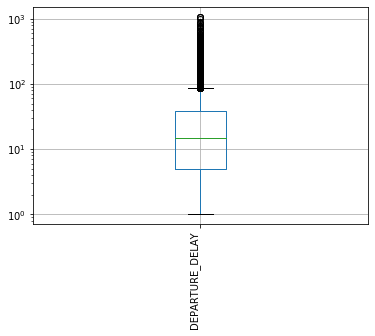

In [46]:
Flights[Flights.DEPARTURE_DELAY >0].boxplot(column=["DEPARTURE_DELAY"]).set_yscale('log')
plt.xticks(rotation=90, ha='right')


### Checking for Outliers

Just like the missing values, the data might also contain some outliers. To find them, I checked the distribution of a single variable Departure-Delay using a boxplot.

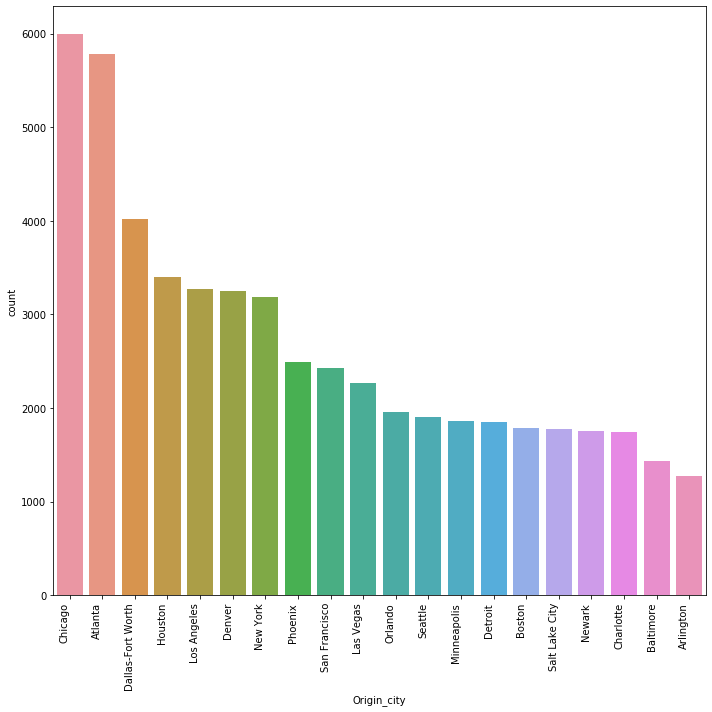

In [47]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

This Count plot shows flights delayed by Origin_City. Chicago has the most delays by Origin_City. Arlington has the least delays by City.


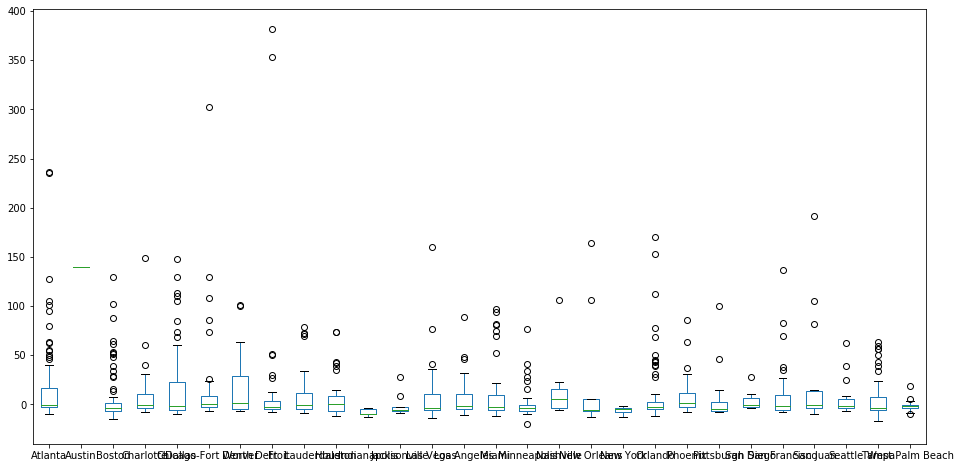

In [48]:

hi_volume_airports_pivots = Flights.pivot_table(index='Date', columns=Flights['Origin_city'].iloc[:1000], values='DEPARTURE_DELAY')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])

This pivot table  show a standardized way of displaying the distribution of data.
It also summary the outliers in the data. 


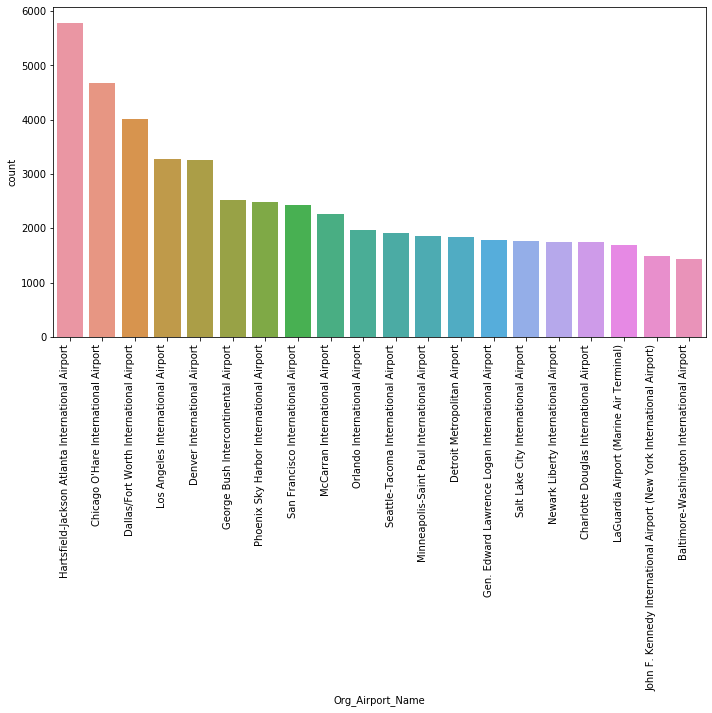

In [49]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

This plot shows flights delayed by Origin_Airport_name. It is seen that more delays are observed from Hartsfield–Jackson Atlanta International Airport. And less delay from Baltimore washington international airport



(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 43 Text xticklabel objects>)

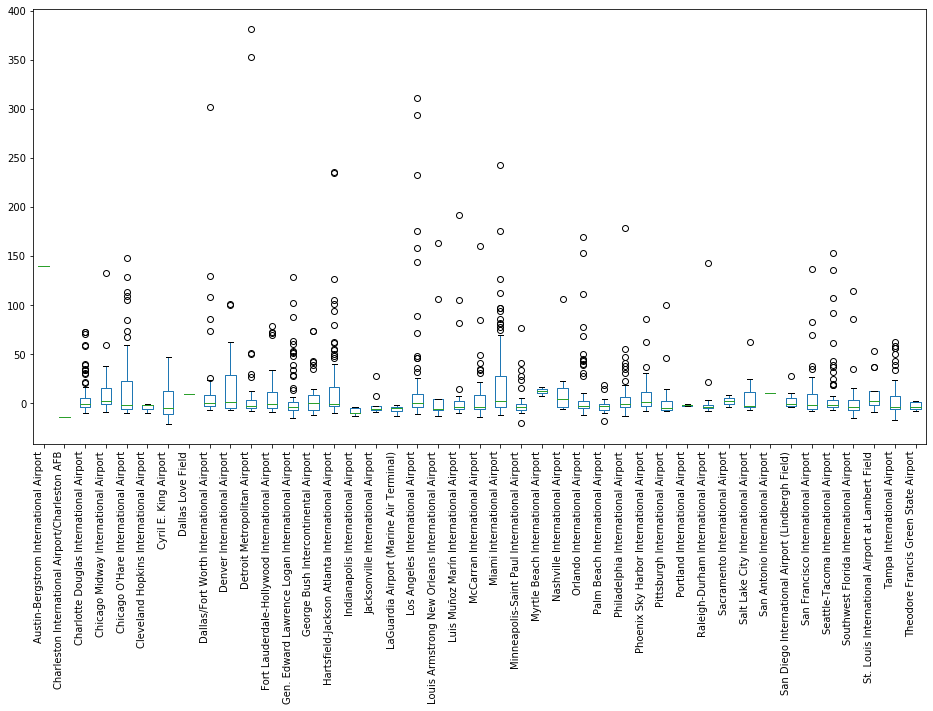

In [50]:
hi_volume_airports_pivots = Flights.pivot_table(index='Date', columns=Flights['Org_Airport_Name'].iloc[:1500], values='DEPARTURE_DELAY')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90, ha='right')

This pivot table summarize the average data in the database.

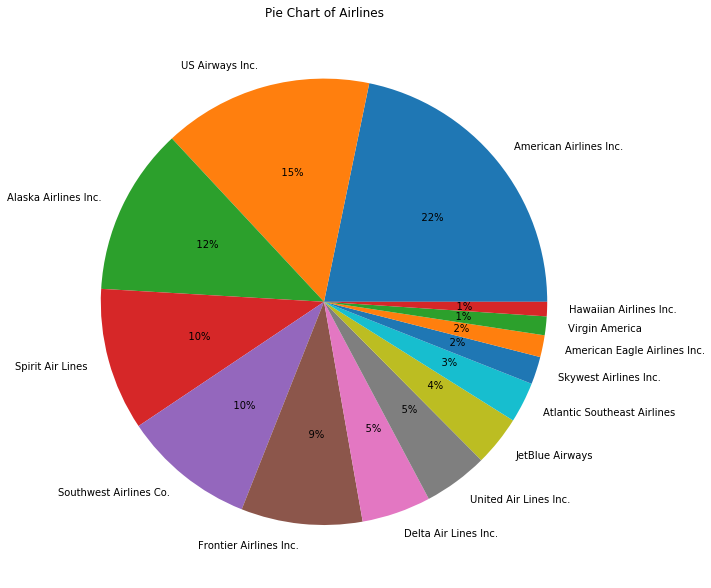

In [51]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.title("Pie Chart of Airlines")
plt.show()

The Pie chart represents the percentage of each Airline in the database. I noticed that American Airlines has the highest percentage, Hawaiin and Virgin have the least percentage of Airlines. 

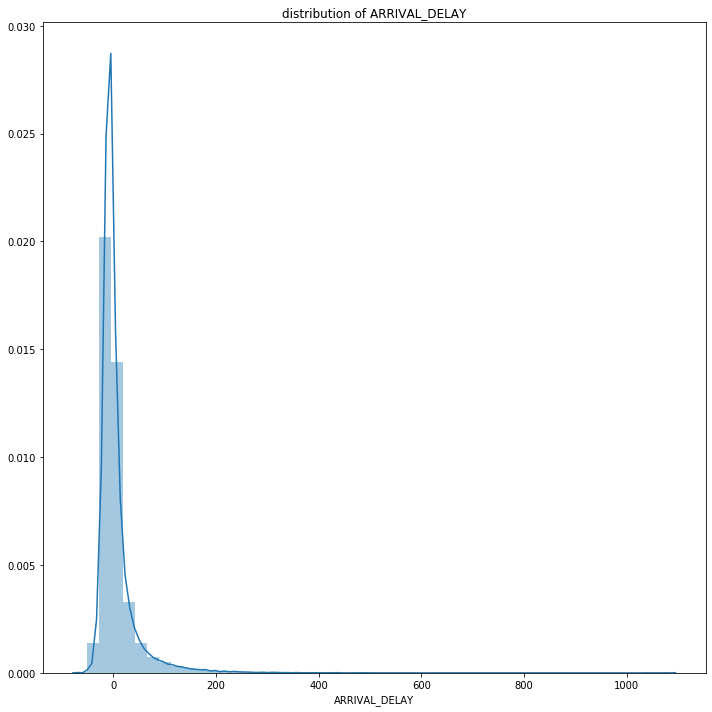

In [52]:
plt.figure(figsize=(10, 10))
axis = sns.distplot(Flights["ARRIVAL_DELAY"]);
plt.title('distribution of ARRIVAL_DELAY')
plt.tight_layout()
plt.show()

The graph above is about density and histogram of Arrival_Delays. The dependent variable is right skewed/positively skewed.

# Visualization to give more clear Insight and Inferences

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: pink)')]

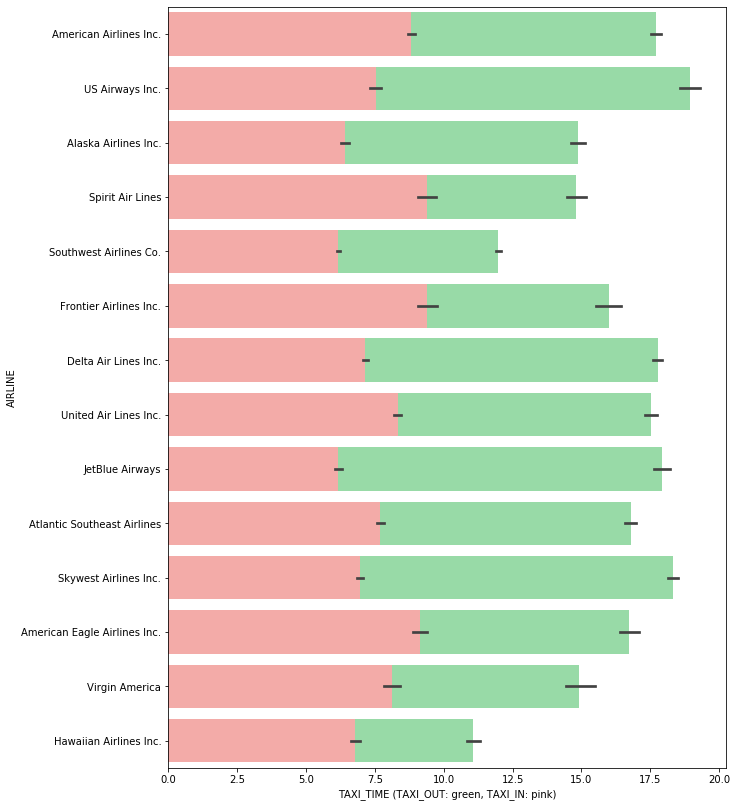

In [53]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=Flights, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=Flights, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: pink)")

This graph represents Taxi_Time: The pink represents taxi-in and the green represent taxi-out.

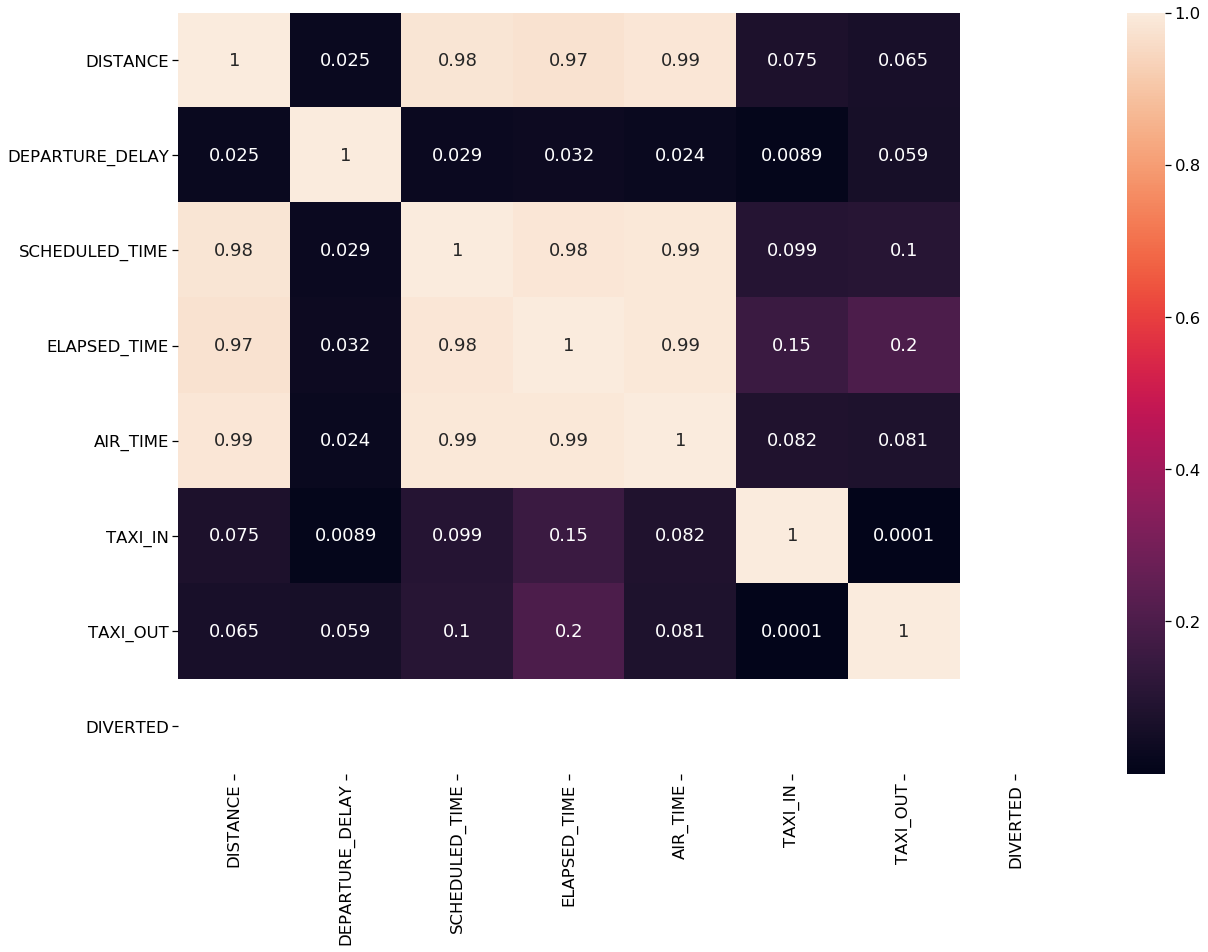

In [79]:
Flight=Flights.drop("ARRIVAL_DELAY",axis=1)
axis = plt.subplots(figsize=(20,14))
sns.heatmap(Flight.corr(),annot = True)
plt.show()

We look at all the variables and we performed the correlation analysis to identify the important variables.
This heat map  shows a visual color summary of the data information.  As you can see the scheduled time is highly correlated/dependent with distance, elapsed time and air time. 
It is obvious that the  longer the distance,  the higher the airtime. The dark cells shows less dependency between features.


# Prediction

In [55]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,American Airlines Inc.,Luis Muñoz Marín International Airport,San Juan,Philadelphia International Airport,Philadelphia,SJU,PHL,1576,15:05:00,2015-08-30,...,-5.0,18:53:00,19:03:00,-10.0,233.0,228.0,204.0,6.0,18.0,0
1,American Airlines Inc.,Luis Muñoz Marín International Airport,San Juan,Philadelphia International Airport,Philadelphia,SJU,PHL,1576,12:51:00,2015-07-31,...,3.0,16:34:00,16:50:00,-16.0,242.0,223.0,197.0,4.0,22.0,0
2,American Airlines Inc.,Luis Muñoz Marín International Airport,San Juan,Philadelphia International Airport,Philadelphia,SJU,PHL,1576,18:28:00,2015-08-09,...,8.0,22:07:00,22:15:00,-8.0,235.0,219.0,202.0,5.0,12.0,0
3,American Airlines Inc.,Luis Muñoz Marín International Airport,San Juan,Philadelphia International Airport,Philadelphia,SJU,PHL,1576,05:26:00,2015-12-25,...,-4.0,08:23:00,08:33:00,-10.0,243.0,237.0,219.0,3.0,15.0,0
4,American Airlines Inc.,Luis Muñoz Marín International Airport,San Juan,Philadelphia International Airport,Philadelphia,SJU,PHL,1576,18:09:00,2015-12-18,...,-6.0,21:02:00,21:14:00,-12.0,239.0,233.0,201.0,18.0,14.0,0


In [56]:
# Dropping unncecssary columns before prediction
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

We dropped some unnecessary columns from the dataset after the Pearson correlation analysis. These columns are Org_Airport_Name, Origin_Cit,  Dest_Airport_Name, Destination_City.
They did not have any effect on the output.


In [57]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

### Importing Sklearn Library

In [58]:
# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [59]:
LinR = LinearRegression()
Rfc = RandomForestRegressor()


In [60]:
le = LabelEncoder()

In [61]:
# Label encoding features to change categorical variables into numerical one
#Flights1['AIRLINE']= pd.get_dummies(Flights1['AIRLINE'])
#Flights1['ORIGIN_AIRPORT'] = pd.get_dummies(Flights1['ORIGIN_AIRPORT'])
#Flights1['DESTINATION_AIRPORT'] = pd.get_dummies(Flights1['DESTINATION_AIRPORT'])
#Flights1['Day'] = pd.get_dummies(Flights1['Day'])

### Feature Selection:

We dropped some unnecessary columns from the dataset after the Pearson correlation analysis. These columns are Org_Airport_Name, Origin_Cit,  Dest_Airport_Name, Destination_City.
They did not have any effect on the output.


In [62]:
Flights1_AIRLINE_dummies = pd.get_dummies(Flights1['AIRLINE'], prefix='AIRLINE', drop_first=True)
Flights1=Flights1.join(Flights1_AIRLINE_dummies, how='inner')

Flights1= Flights1.drop("AIRLINE",axis =1)
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89719 entries, 0 to 89767
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ORIGIN_AIRPORT                        89719 non-null  object        
 1   DESTINATION_AIRPORT                   89719 non-null  object        
 2   DISTANCE                              89719 non-null  int64         
 3   Actual_Departure                      89719 non-null  object        
 4   Date                                  89719 non-null  datetime64[ns]
 5   Day                                   89719 non-null  datetime64[ns]
 6   Scheduled_Departure                   89719 non-null  object        
 7   DEPARTURE_DELAY                       89719 non-null  float64       
 8   Actual_Arrival                        89719 non-null  object        
 9   Scheduled_Arrival                     89719 non-null  object        
 10

In [63]:
Flights1_AIRLINE_dummies = pd.get_dummies(Flights1['ORIGIN_AIRPORT'], prefix='ORIGIN_AIRPORT', drop_first=True)
Flights1=Flights1.join(Flights1_AIRLINE_dummies, how='inner')

Flights1= Flights1.drop('ORIGIN_AIRPORT',axis =1)

In [64]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89719 entries, 0 to 89767
Columns: 345 entries, DESTINATION_AIRPORT to ORIGIN_AIRPORT_YUM
dtypes: datetime64[ns](2), float64(7), int64(2), object(5), uint8(329)
memory usage: 42.3+ MB


In [65]:
Flights1_AIRLINE_dummies = pd.get_dummies(Flights1['DESTINATION_AIRPORT'], prefix='DESTINATION_AIRPORT', drop_first=True)
Flights1=Flights1.join(Flights1_AIRLINE_dummies, how='inner')

Flights1= Flights1.drop('DESTINATION_AIRPORT',axis =1)

In [66]:
Flights1_AIRLINE_dummies = pd.get_dummies(Flights1['Day'], prefix='', drop_first=True)
Flights1=Flights1.join(Flights1_AIRLINE_dummies, how='inner')

Flights1= Flights1.drop('Day',axis =1)

In [67]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

Flights1.info()

In [68]:
X = Flights1.drop(['DEPARTURE_DELAY', 'ARRIVAL_DELAY'],axis = 1)
X.shape

(89719, 986)

In [69]:
y = Flights1['DEPARTURE_DELAY']
y.head()

0   -5.0
1    3.0
2    8.0
3   -4.0
4   -6.0
Name: DEPARTURE_DELAY, dtype: float64

In [70]:
# Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

### Standard Scaler

We converted the categorical variables into dummy variables (one-hot encoding). Then we scaled the data using the standard scaling method. Standard scaling transforms numerical features to have a mean of 0 and variance of 1.

In [71]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# Model fitting and results

To make the prediction I tried “the basic model types” Linear Regression, decision Tree and Random Forest Regression. 

Linear Regression is a machine learning algorithm based on supervised learning.
                                    Y = a + bX
It was appropriate to  use  linear regression because it performed better on the test set in contrast to the  other  models who tend to be overfitted on the training dataset. 
It was not appropriate to use linear regression because it tends to perform better when there is linear relationship between input and output.

### Advantage/Disavantage/ Linear Regression

Linear regression provides a powerful statistical method to find the relationship between variables.  However, it’s only limited to linear relationships.

Linear regression produces the best predictive accuracy for linear relationship whereas its little sensitive to outliers and only looks at the mean of the dependent variable.


### Decision Tree Vs Random Forest

We tried decision trees to look for the hidden patterns in the data. 

We used Random Forest to see if ensemble of decision trees performed any better than the Decision Trees

### Random Forest

### Advantages

The random forest algorithm works well when the data sets  have both categorical and numerical features.
The random forest algorithm also works well when data has missing values or it has not been scaled 

### Disadvantages
A major disadvantage of random forests lies in their complexity. Random Forest required much more computational resources, owing to the large number of decision trees joined together. Due to their complexity, they require much more time to train than other comparable algorithms.

### Decision Tree

### Advantage 
Decision tree can handle both numerical and categorical data. And it is extremely fast to run.

### Disadvantage
The model is prone to overfitting, especially when a tree is particularly deep.





In [72]:
for model, name in zip([LinR,Rfc,Dtc], 
     ['Linear Regression','Random forest Regressor',"DecisionTreeRegressor"]):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()


Linear Regression
Mean Absolute Error: 18.39922563412102
Mean Squared Error: 1277.0927484702281
Root Mean Squared Error: 35.73643446778411
R2 :  0.028298113427712046

Random forest Regressor
Mean Absolute Error: 17.29092119928667
Mean Squared Error: 1425.9005813698175
Root Mean Squared Error: 37.761098783931295
R2 :  -0.08492534049798817

DecisionTreeRegressor
Mean Absolute Error: 21.48367142220241
Mean Squared Error: 2389.095575122604
Root Mean Squared Error: 48.878375332273514
R2 :  -0.8177917620540451



### Communication
Out of these 3 models, linear regression performs better. Linear Regression has a smaller R-Squared and Root Mean Squared Error than the other models.

|name |R2 | Root Mean Squared Error |
| --- | --- | --- |
| Linear Regression       |0.028298113427712046 |35.73643446778411 |
| Random forest Regressor |  -0.08492534049798817 | 37.761098783931295 |
| Decision Tree Regressor |  -0.8177917620540451|48.878375332273514 |




### How Do We  Picked Parameters For The Model Use?

For linear regression, we used the default parameters of sklearn.

For decision tree, we used mse as the error, all of the features for max_features, and we did not limit the max_depth.

For random forest, we searched for number of trees and max_depth using GRID search. 
Example, number of trees that were searched was [1,15,5] and max depth  [1,12,3]

We used gridsearch to cross validate the model as well as Root Mean Squared Error(rmse) and R-squared 
to evaluate the performance of the model.


In [73]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
    true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

In [74]:
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
def fit_model_rf(X, y):

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = RandomForestRegressor()
    
    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 12, 3),'n_estimators': range(1, 15, 5)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets, verbose= 0)# which model will be optimal, plot performance and see how it
    
 
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid

In [75]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1,figsize=(15,10))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Conclusion

We used three different algorithms to Predict Flight Delays at the destination Airport. However, Linear regression performs better than the other models. For future reference, We can improve the performance by trying polynomial regression or some complicated model like a neural network.

### Results

Linear Regression
Mean Absolute Error: 18.39922563412102
Mean Squared Error: 1277.0927484702281
Root Mean Squared Error: 35.73643446778411
R2 :  0.028298113427712046

Random forest Regressor
Mean Absolute Error: 17.29092119928667
Mean Squared Error: 1425.9005813698175
Root Mean Squared Error: 37.761098783931295
R2 :  -0.08492534049798817

DecisionTreeRegressor
Mean Absolute Error: 21.48367142220241
Mean Squared Error: 2389.095575122604
Root Mean Squared Error: 48.878375332273514
R2 :  -0.8177917620540451

